# БДЗ пятый раздел

In [1]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
import pandas as pd

In [2]:
X = pd.read_excel(open('data_matstat_K5.xls', 'rb'), sheet_name='C - plasma')['C11'].to_numpy()
Y = pd.read_excel(open('data_matstat_K5.xls', 'rb'), sheet_name='C - plasma')['C12'].to_numpy()

n1 = len(X)
n2 = len(Y)
print(n1, n2)

315 315


### 5.1 Критерий знаков

In [3]:
ans = sps.wilcoxon(X, Y)
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

Sign test: z = 2424.000, p-value = 0.000


### 5.2. Критерий хи-квадрат

In [4]:
print("Число групп по формуле Стерджесса : {z}".format(z = 1 + int(math.log(n1, 2))))
print("Ширина интервалов : {z}".format(z = 1 + int(math.log(n1, 2))))

Число групп по формуле Стерджесса : 9
Ширина интервалов : 9


[96, 106, 58, 30, 12, 6, 5, 1, 1]
[179, 114, 18, 2, 0, 1, 0, 0, 1]
[0.3, 0.34, 0.18, 0.1, 0.04, 0.02, 0.02, 0.0, 0.0]
[0.57, 0.36, 0.06, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0]
[214, 1261, 2309, 3356, 4404, 5451, 6499, 7546, 8594, 9642]
[30, 793, 1556, 2320, 3083, 3847, 4610, 5374, 6137, 6901]
Сhi-squared test: z = 86.683, p-value = 0.000


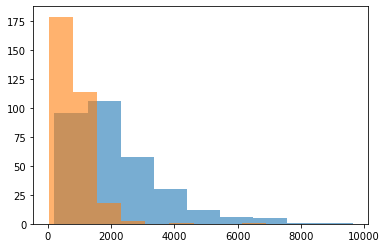

In [39]:
result = plt.hist(X,  bins=9, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_X = result[0]
values_X = result[1]
result = plt.hist(Y,  bins=9, density=False, alpha=0.6, label='Гистограмма частот')
frequencies_Y = result[0]
values_Y = result[1]
relative_freq_X = []
relative_freq_Y = []

for i in range(len(frequencies_X)):
    relative_freq_X.append(round(frequencies_X[i]/n1, 2))
    relative_freq_Y.append(round(frequencies_Y[i]/n2, 2))
print([int(item) for item in frequencies_X])
print([int(item) for item in frequencies_Y])
print(relative_freq_X)
print(relative_freq_Y)
#print(sum(relative_freq_X)) для проверки 
#print(sum(relative_freq_Y)) что сумма относительных частот 1 
print([int(item) for item in values_X])
print([int(item) for item in values_Y])

ans = sps.chi2_contingency([[ 96, 106,  113], [179, 114,  22]]) #вручную убрал частоты <= 5
print('Сhi-squared test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z =ans[0] , p_value = ans[1]))

В результате проведённого в п.5 статистического анализа удалось определить, что выборки С11 и С12 имеют разные распределения. Критерий знаков и критерий хи-квадрат отвергли гипотезу однородности. Следовательно, по проведенному анализу, мы можем определить, что выборки C11(...) и C12(...) неоднородны.